<a href="https://colab.research.google.com/github/NguyenDacCuong2604/KLTN_2024/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Thesis'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis


In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score,make_scorer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
type_vectorizer = ['TFIDF', 'Doc2Vec', 'Word2Vec']
type_data = ['K_Means_Multi_Label_Remove_Np', 'K_Means_Multi_Label', 'K_Means_Single_Label_Remove_Np', 'K_Means_Single_Label', 'Multi_Label_Remove_Np', 'Multi_Label', 'Single_Label_Remove_Np', 'Single_Label']

TFIDF
Accuracy: 0.8341790135985386
Precision: 0.8376064705194847
Recall: 0.8341790135985386
F1 Score: 0.8305162961779574
Classification Report:
              precision    recall  f1-score   support

     2733522       0.84      0.60      0.70       247
     2733534       0.93      0.52      0.67       131
     2733540       0.82      0.77      0.80       487
     2733546       0.88      0.87      0.87      1931
     2733552       0.79      0.91      0.85      1816
     2733570       0.81      0.58      0.68       315

    accuracy                           0.83      4927
   macro avg       0.85      0.71      0.76      4927
weighted avg       0.84      0.83      0.83      4927



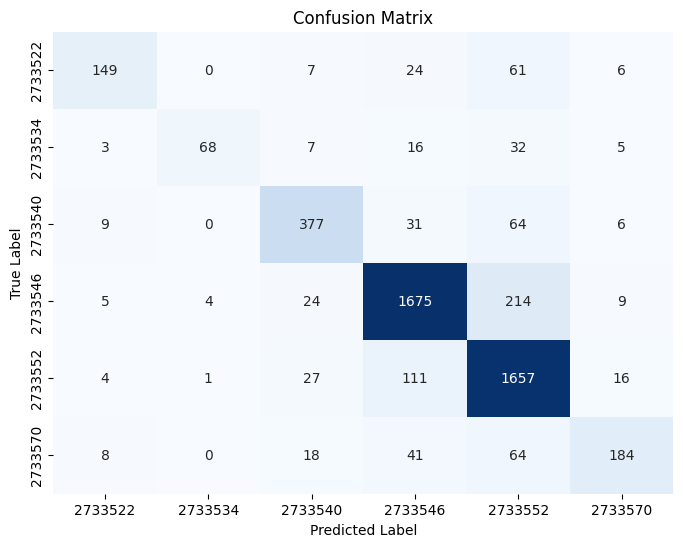

Doc2Vec
Accuracy: 0.781408565049726
Precision: 0.8014396107493481
Recall: 0.781408565049726
F1 Score: 0.7756673838259971
Classification Report:
              precision    recall  f1-score   support

     2733522       0.80      0.53      0.63       247
     2733534       0.95      0.41      0.57       131
     2733540       0.81      0.72      0.76       487
     2733546       0.88      0.79      0.83      1931
     2733552       0.69      0.91      0.79      1816
     2733570       0.88      0.42      0.57       315

    accuracy                           0.78      4927
   macro avg       0.83      0.63      0.69      4927
weighted avg       0.80      0.78      0.78      4927



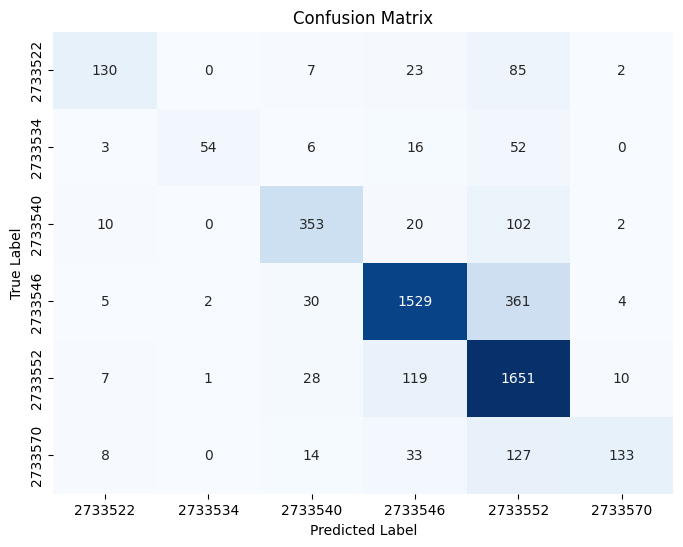

Word2Vec
Accuracy: 0.7140247615181652
Precision: 0.7619168173865072
Recall: 0.7140247615181652
F1 Score: 0.7013964252354749
Classification Report:
              precision    recall  f1-score   support

     2733522       0.86      0.25      0.38       247
     2733534       0.90      0.28      0.43       131
     2733540       0.82      0.63      0.71       487
     2733546       0.84      0.70      0.76      1931
     2733552       0.61      0.91      0.73      1816
     2733570       0.94      0.34      0.50       315

    accuracy                           0.71      4927
   macro avg       0.83      0.52      0.59      4927
weighted avg       0.76      0.71      0.70      4927



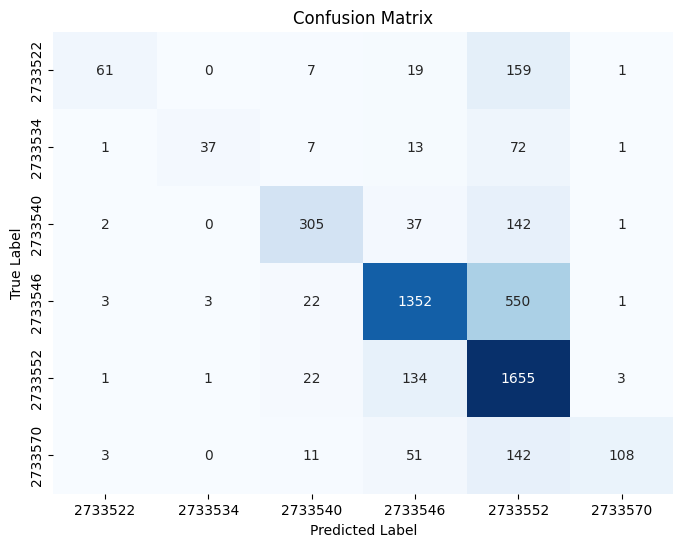

In [ ]:
for type_data_element in type_data:
  for type_vectorizer_element in type_vectorizer:
    print(type_data_element, type_vectorizer_element)
    folder_data = '/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/' + type_data_element + '/' + type_vectorizer_element
    df_train = pd.read_csv(folder_data + '/train.csv')
    df_test = pd.read_csv(folder_data + '/test.csv')
    X_train = df_train.drop(columns = ['label'])
    y_train = df_train['label']
    X_test = df_test.drop(columns = ['label'])
    y_test = df_test['label']

    model = SVC(kernel='rbf', gamma='scale', C=1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Tính độ chính xác dự báo dương (Precision)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision}")

    # Tính khả năng phát hiện đúng (Recall)
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall}")

    # Tính điểm F1 (F1 Score)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1}")

    # In báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)

    # Lấy các giá trị nhãn từ y_train (không trùng lặp và sắp xếp)
    labels = sorted(list(set(y_train)))

    # Vẽ biểu đồ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    joblib.dump(model, folder_data + '/svm_model.joblib')

In [5]:
def vectorize_input(input_text, model):
    vectorized_input = []
    for sentence in input_text:
        # Lấy vector trung bình của các từ trong câu
        vectors = [model.wv[word] for word in sentence if word in model.wv]
        if vectors:
            vector = np.mean(vectors, axis=0)
        else:
            vector = np.zeros(model.vector_size)
        vectorized_input.append(vector)
    return vectorized_input

K_Means_Multi_Label_Remove_Np TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9158498685154196
Precision: 0.9180168309307432
Recall: 0.9158498685154196
F1 Score: 0.9161314781235361
Classification Report:
              precision    recall  f1-score   support

     2733522       0.92      0.90      0.91       164
     2733534       0.87      0.86      0.87        79
     2733540       0.85      0.94      0.89       385
     2733546       0.96      0.90      0.93      1720
     2733552       0.90      0.94      0.92      1612
     2733570       0.86      0.87      0.87       223

    accuracy                           0.92      4183
   macro avg       0.89      0.90      0.90      4183
weighted avg       0.92      0.92      0.92      4183



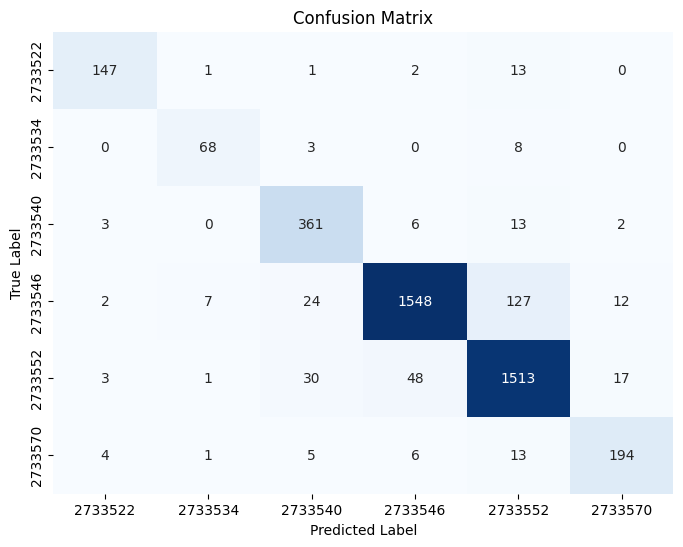

K_Means_Multi_Label_Remove_Np Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7901027970356204
Precision: 0.8095986393152783
Recall: 0.7901027970356204
F1 Score: 0.7917396599601682
Classification Report:
              precision    recall  f1-score   support

     2733522       0.80      0.73      0.76       164
     2733534       0.98      0.58      0.73        79
     2733540       0.64      0.87      0.74       385
     2733546       0.92      0.74      0.82      1720
     2733552       0.74      0.86      0.79      1612
     2733570       0.69      0.66      0.68       223

    accuracy                           0.79      4183
   macro avg       0.79      0.74      0.75      4183
weighted avg       0.81      0.79      0.79      4183



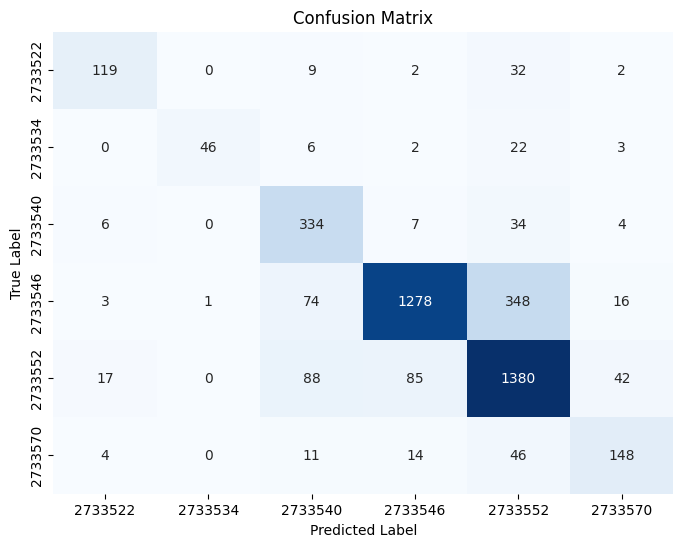

K_Means_Multi_Label_Remove_Np Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7222089409514703
Precision: 0.751387123588415
Recall: 0.7222089409514703
F1 Score: 0.7253807594412054
Classification Report:
              precision    recall  f1-score   support

     2733522       0.42      0.70      0.53       164
     2733534       0.80      0.52      0.63        79
     2733540       0.66      0.83      0.74       385
     2733546       0.88      0.65      0.75      1720
     2733552       0.69      0.79      0.74      1612
     2733570       0.61      0.66      0.64       223

    accuracy                           0.72      4183
   macro avg       0.68      0.69      0.67      4183
weighted avg       0.75      0.72      0.73      4183



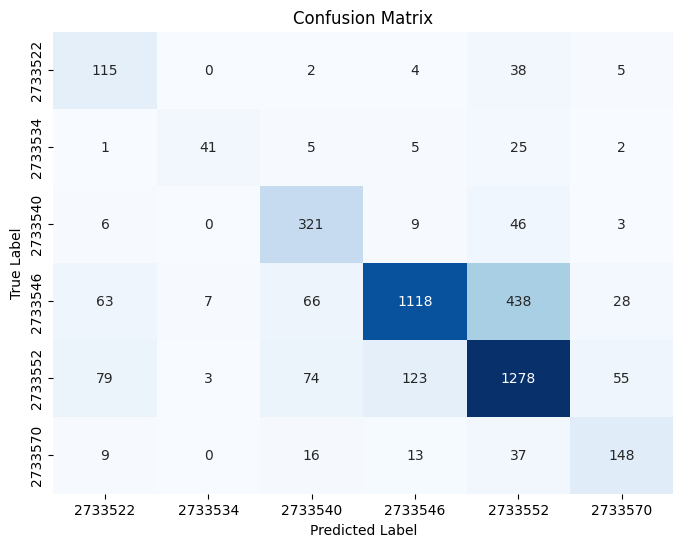

K_Means_Multi_Label TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9160889313889553
Precision: 0.9177590206250832
Recall: 0.9160889313889553
F1 Score: 0.9163123399131318
Classification Report:
              precision    recall  f1-score   support

     2733522       0.90      0.88      0.89       164
     2733534       0.90      0.89      0.89        79
     2733540       0.87      0.94      0.91       385
     2733546       0.96      0.90      0.93      1720
     2733552       0.90      0.93      0.92      1612
     2733570       0.85      0.87      0.86       223

    accuracy                           0.92      4183
   macro avg       0.90      0.90      0.90      4183
weighted avg       0.92      0.92      0.92      4183



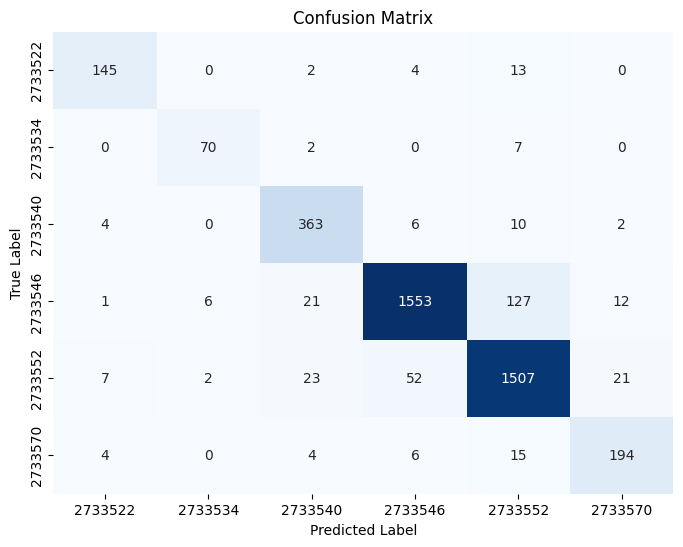

K_Means_Multi_Label Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7924934257709778
Precision: 0.8143223656379541
Recall: 0.7924934257709778
F1 Score: 0.7948329472515361
Classification Report:
              precision    recall  f1-score   support

     2733522       0.77      0.77      0.77       164
     2733534       0.98      0.59      0.74        79
     2733540       0.60      0.88      0.71       385
     2733546       0.93      0.74      0.82      1720
     2733552       0.76      0.86      0.81      1612
     2733570       0.69      0.67      0.68       223

    accuracy                           0.79      4183
   macro avg       0.79      0.75      0.76      4183
weighted avg       0.81      0.79      0.79      4183



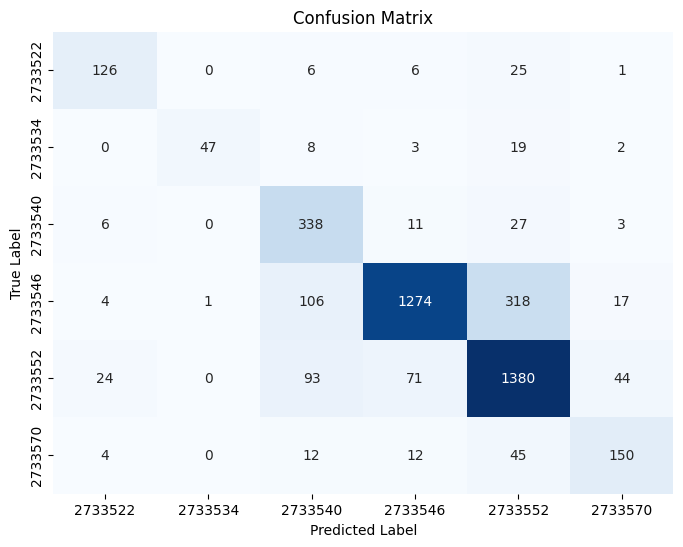

K_Means_Multi_Label Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.722448003825006
Precision: 0.7504283852412165
Recall: 0.722448003825006
F1 Score: 0.726074506734778
Classification Report:
              precision    recall  f1-score   support

     2733522       0.44      0.71      0.54       164
     2733534       0.84      0.54      0.66        79
     2733540       0.63      0.82      0.71       385
     2733546       0.88      0.66      0.75      1720
     2733552       0.69      0.78      0.74      1612
     2733570       0.59      0.65      0.62       223

    accuracy                           0.72      4183
   macro avg       0.68      0.70      0.67      4183
weighted avg       0.75      0.72      0.73      4183



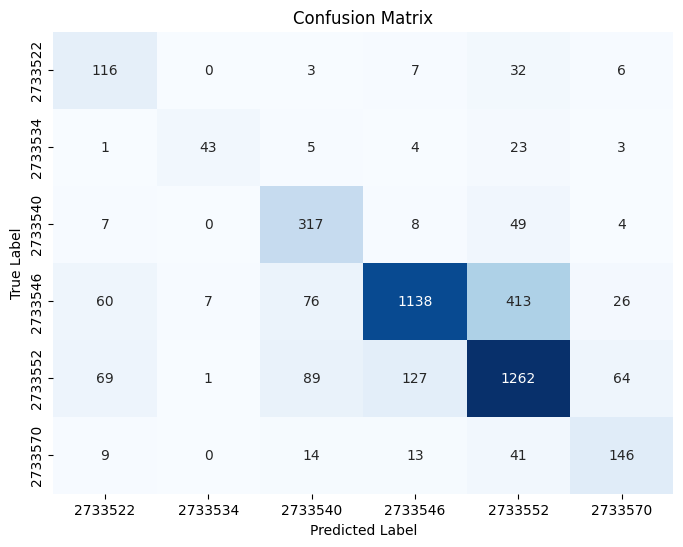

K_Means_Single_Label_Remove_Np TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9184795601243126
Precision: 0.9206337000829287
Recall: 0.9184795601243126
F1 Score: 0.9185472919311265
Classification Report:
              precision    recall  f1-score   support

     2733522       0.93      0.88      0.90       164
     2733534       0.89      0.90      0.89        79
     2733540       0.92      0.94      0.93       385
     2733546       0.96      0.90      0.93      1720
     2733552       0.88      0.95      0.92      1612
     2733570       0.90      0.85      0.88       223

    accuracy                           0.92      4183
   macro avg       0.91      0.90      0.91      4183
weighted avg       0.92      0.92      0.92      4183



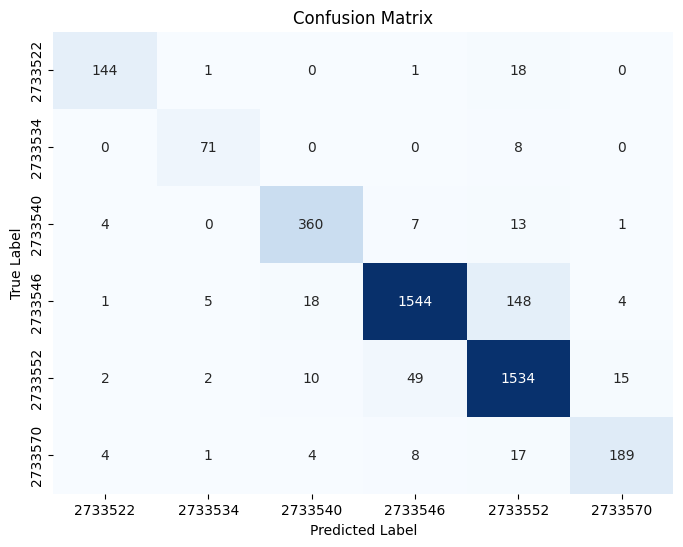

K_Means_Single_Label_Remove_Np Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7724121443939757
Precision: 0.7918158926360374
Recall: 0.7724121443939757
F1 Score: 0.7704549311476743
Classification Report:
              precision    recall  f1-score   support

     2733522       0.82      0.68      0.74       164
     2733534       1.00      0.37      0.54        79
     2733540       0.65      0.86      0.74       385
     2733546       0.89      0.72      0.80      1720
     2733552       0.72      0.87      0.79      1612
     2733570       0.70      0.52      0.60       223

    accuracy                           0.77      4183
   macro avg       0.80      0.67      0.70      4183
weighted avg       0.79      0.77      0.77      4183



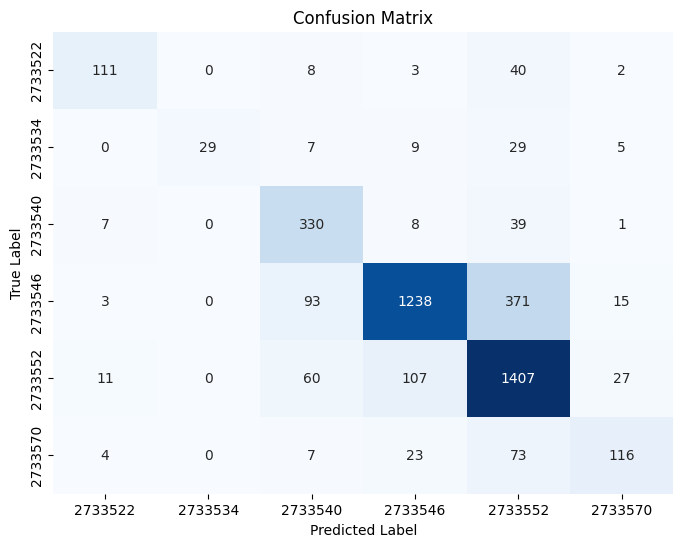

K_Means_Single_Label_Remove_Np Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7348792732488645
Precision: 0.7542995548979229
Recall: 0.7348792732488645
F1 Score: 0.7349215350556385
Classification Report:
              precision    recall  f1-score   support

     2733522       0.52      0.63      0.57       164
     2733534       0.81      0.49      0.61        79
     2733540       0.71      0.81      0.75       385
     2733546       0.86      0.67      0.75      1720
     2733552       0.68      0.83      0.74      1612
     2733570       0.75      0.57      0.65       223

    accuracy                           0.73      4183
   macro avg       0.72      0.67      0.68      4183
weighted avg       0.75      0.73      0.73      4183



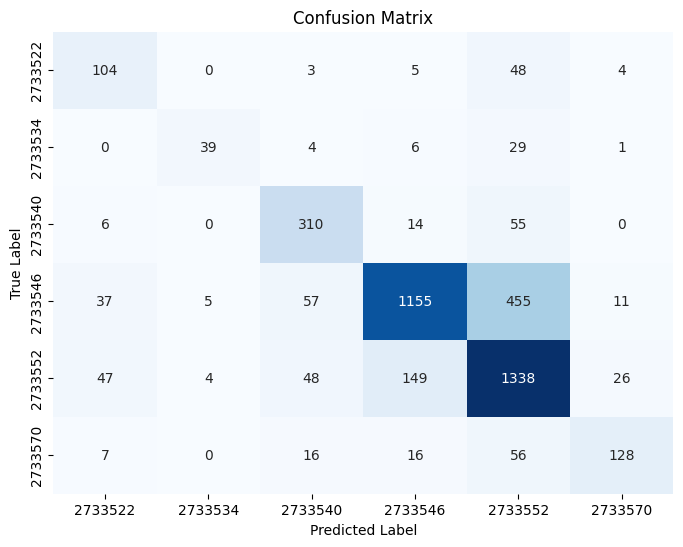

K_Means_Single_Label TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9242170690891705
Precision: 0.9264033072413931
Recall: 0.9242170690891705
F1 Score: 0.9243367628142731
Classification Report:
              precision    recall  f1-score   support

     2733522       0.94      0.88      0.91       164
     2733534       0.92      0.87      0.90        79
     2733540       0.95      0.94      0.94       385
     2733546       0.96      0.91      0.93      1720
     2733552       0.88      0.96      0.92      1612
     2733570       0.90      0.85      0.87       223

    accuracy                           0.92      4183
   macro avg       0.92      0.90      0.91      4183
weighted avg       0.93      0.92      0.92      4183



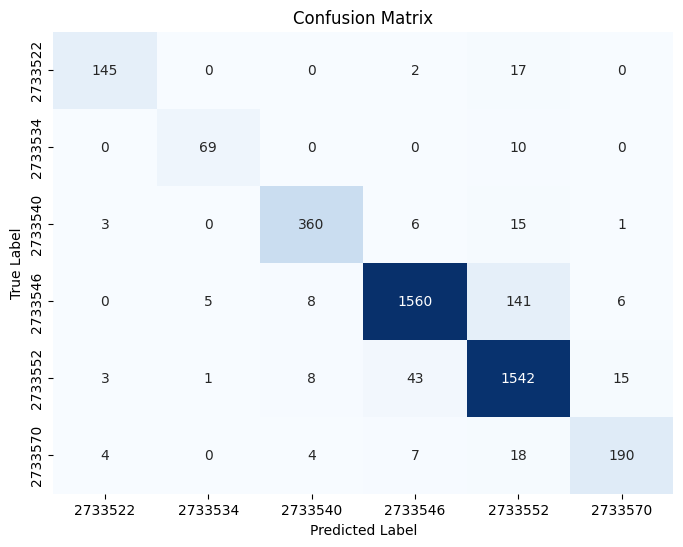

K_Means_Single_Label Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7857996653119771
Precision: 0.8023095738137688
Recall: 0.7857996653119771
F1 Score: 0.7843855838659648
Classification Report:
              precision    recall  f1-score   support

     2733522       0.79      0.70      0.74       164
     2733534       1.00      0.44      0.61        79
     2733540       0.70      0.85      0.77       385
     2733546       0.90      0.73      0.81      1720
     2733552       0.73      0.88      0.80      1612
     2733570       0.71      0.57      0.64       223

    accuracy                           0.79      4183
   macro avg       0.81      0.70      0.73      4183
weighted avg       0.80      0.79      0.78      4183



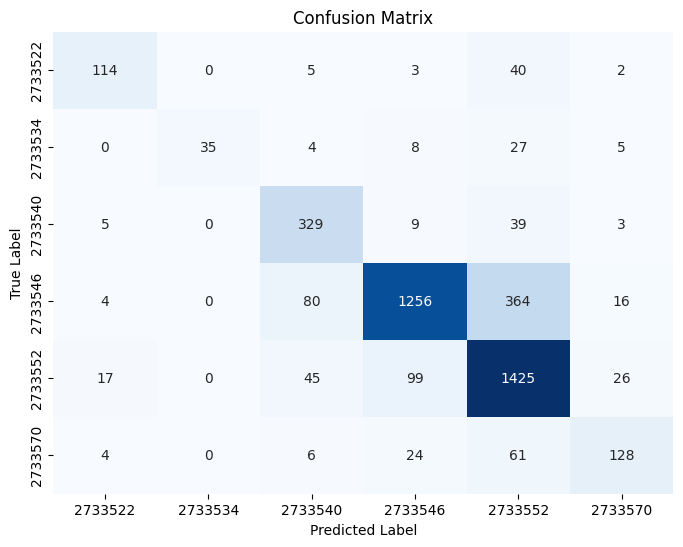

K_Means_Single_Label Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.734401147501793
Precision: 0.7525362565711317
Recall: 0.734401147501793
F1 Score: 0.7348346747079544
Classification Report:
              precision    recall  f1-score   support

     2733522       0.49      0.66      0.56       164
     2733534       0.84      0.52      0.64        79
     2733540       0.72      0.81      0.76       385
     2733546       0.84      0.67      0.75      1720
     2733552       0.68      0.82      0.75      1612
     2733570       0.78      0.59      0.67       223

    accuracy                           0.73      4183
   macro avg       0.73      0.68      0.69      4183
weighted avg       0.75      0.73      0.73      4183



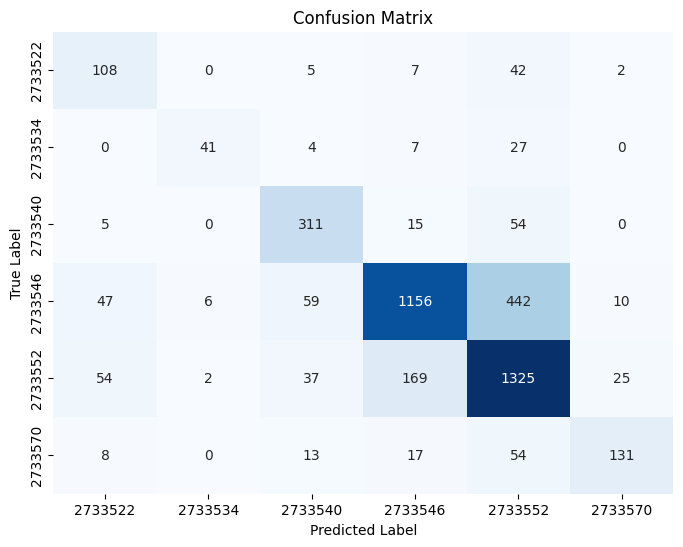

Multi_Label_Remove_Np TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9304327038010997
Precision: 0.9318903010067203
Recall: 0.9304327038010997
F1 Score: 0.9302217749769306
Classification Report:
              precision    recall  f1-score   support

     2733522       0.95      0.87      0.91       164
     2733534       0.97      0.84      0.90        79
     2733540       0.98      0.92      0.95       385
     2733546       0.95      0.93      0.94      1720
     2733552       0.90      0.96      0.93      1612
     2733570       0.92      0.79      0.85       223

    accuracy                           0.93      4183
   macro avg       0.95      0.89      0.91      4183
weighted avg       0.93      0.93      0.93      4183



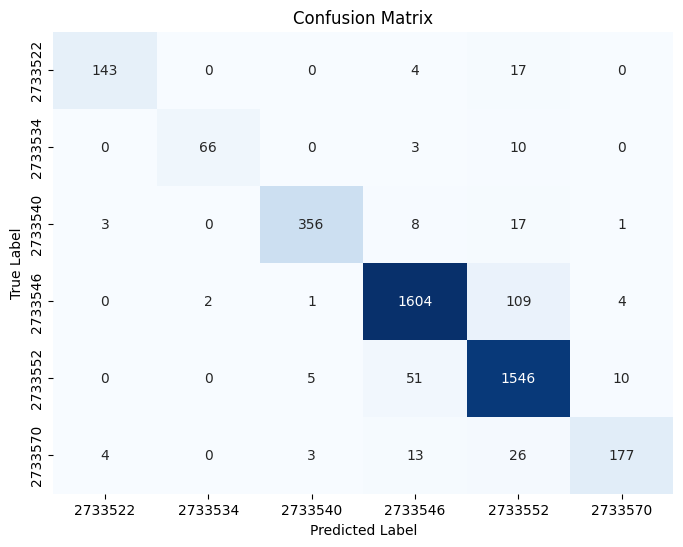

Multi_Label_Remove_Np Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8713841740377719
Precision: 0.8811134373158586
Recall: 0.8713841740377719
F1 Score: 0.8703841175797086
Classification Report:
              precision    recall  f1-score   support

     2733522       0.91      0.77      0.84       164
     2733534       1.00      0.66      0.79        79
     2733540       0.95      0.86      0.90       385
     2733546       0.93      0.86      0.90      1720
     2733552       0.80      0.94      0.86      1612
     2733570       0.92      0.59      0.72       223

    accuracy                           0.87      4183
   macro avg       0.92      0.78      0.84      4183
weighted avg       0.88      0.87      0.87      4183



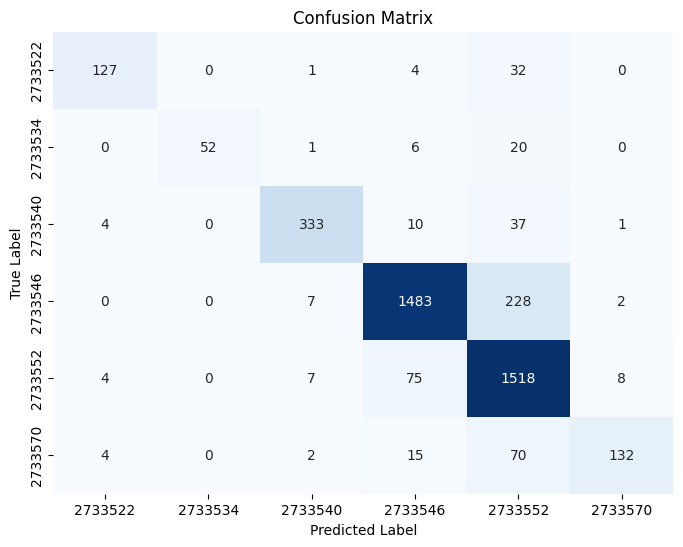

Multi_Label_Remove_Np Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7901027970356204
Precision: 0.8235232257177894
Recall: 0.7901027970356204
F1 Score: 0.7852470344178709
Classification Report:
              precision    recall  f1-score   support

     2733522       0.94      0.36      0.52       164
     2733534       0.92      0.46      0.61        79
     2733540       0.95      0.75      0.84       385
     2733546       0.89      0.76      0.82      1720
     2733552       0.69      0.93      0.79      1612
     2733570       0.99      0.48      0.64       223

    accuracy                           0.79      4183
   macro avg       0.90      0.62      0.70      4183
weighted avg       0.82      0.79      0.79      4183



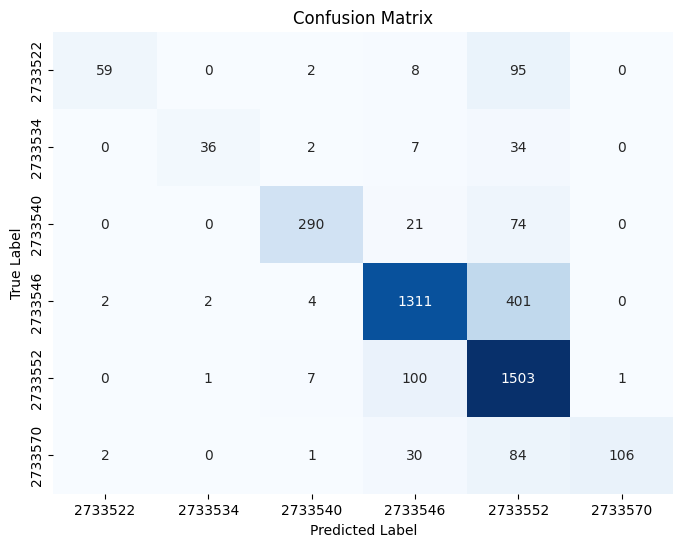

Multi_Label TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9289983265598852
Precision: 0.930263083864745
Recall: 0.9289983265598852
F1 Score: 0.9288209522550971
Classification Report:
              precision    recall  f1-score   support

     2733522       0.94      0.87      0.91       164
     2733534       0.97      0.86      0.91        79
     2733540       0.98      0.92      0.95       385
     2733546       0.95      0.93      0.94      1720
     2733552       0.90      0.95      0.92      1612
     2733570       0.92      0.79      0.85       223

    accuracy                           0.93      4183
   macro avg       0.94      0.89      0.91      4183
weighted avg       0.93      0.93      0.93      4183



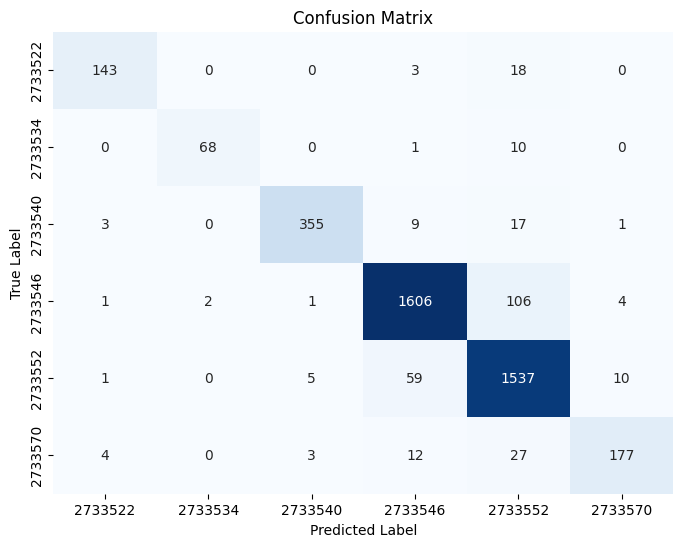

Multi_Label Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8740138656466651
Precision: 0.8816561523448017
Recall: 0.8740138656466651
F1 Score: 0.87307164695412
Classification Report:
              precision    recall  f1-score   support

     2733522       0.91      0.77      0.83       164
     2733534       1.00      0.66      0.79        79
     2733540       0.95      0.85      0.90       385
     2733546       0.92      0.87      0.90      1720
     2733552       0.81      0.94      0.87      1612
     2733570       0.92      0.62      0.74       223

    accuracy                           0.87      4183
   macro avg       0.92      0.79      0.84      4183
weighted avg       0.88      0.87      0.87      4183



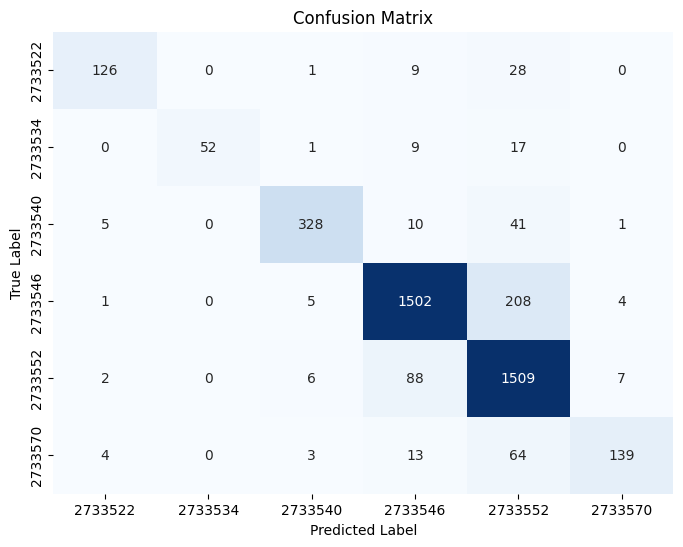

Multi_Label Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7972746832416926
Precision: 0.824974080004066
Recall: 0.7972746832416926
F1 Score: 0.7926918328065072
Classification Report:
              precision    recall  f1-score   support

     2733522       0.94      0.41      0.57       164
     2733534       0.95      0.44      0.60        79
     2733540       0.95      0.73      0.82       385
     2733546       0.87      0.79      0.83      1720
     2733552       0.70      0.92      0.80      1612
     2733570       1.00      0.49      0.66       223

    accuracy                           0.80      4183
   macro avg       0.90      0.63      0.71      4183
weighted avg       0.82      0.80      0.79      4183



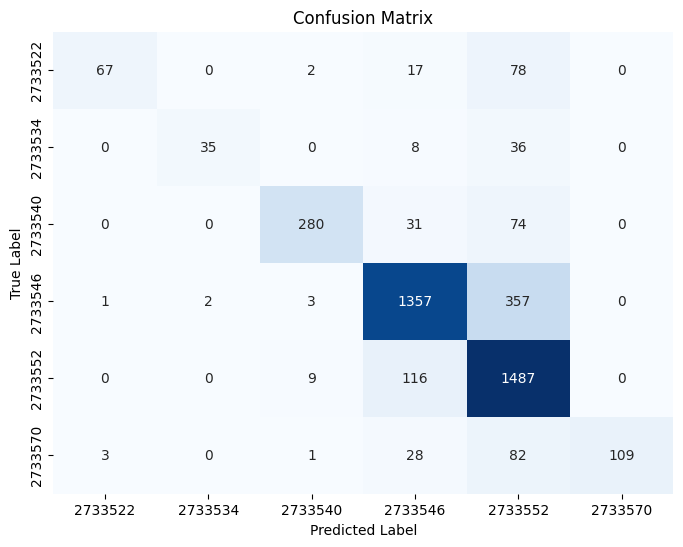

Single_Label_Remove_Np TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9299545780540283
Precision: 0.9314621270857524
Recall: 0.9299545780540283
F1 Score: 0.9297451674733647
Classification Report:
              precision    recall  f1-score   support

     2733522       0.95      0.87      0.91       164
     2733534       0.97      0.85      0.91        79
     2733540       0.97      0.92      0.95       385
     2733546       0.95      0.93      0.94      1720
     2733552       0.89      0.96      0.93      1612
     2733570       0.92      0.79      0.85       223

    accuracy                           0.93      4183
   macro avg       0.94      0.89      0.91      4183
weighted avg       0.93      0.93      0.93      4183



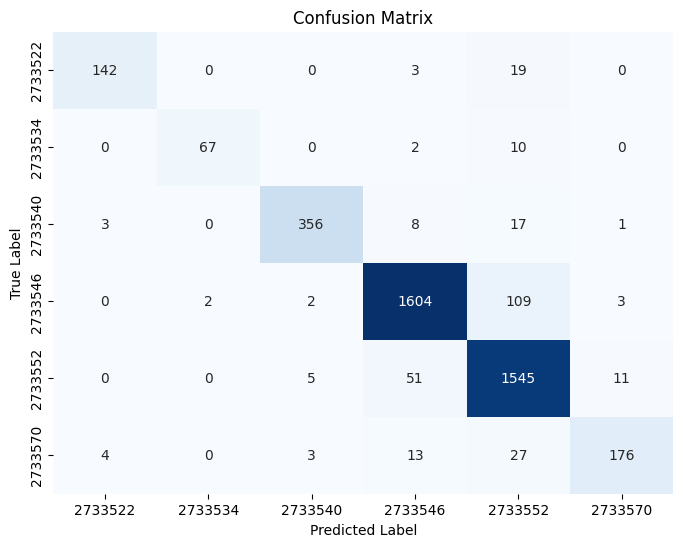

Single_Label_Remove_Np Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8642122878316998
Precision: 0.8727820890117338
Recall: 0.8642122878316998
F1 Score: 0.8628215035219228
Classification Report:
              precision    recall  f1-score   support

     2733522       0.89      0.76      0.82       164
     2733534       1.00      0.63      0.78        79
     2733540       0.93      0.84      0.89       385
     2733546       0.92      0.86      0.89      1720
     2733552       0.80      0.93      0.86      1612
     2733570       0.91      0.58      0.71       223

    accuracy                           0.86      4183
   macro avg       0.91      0.77      0.82      4183
weighted avg       0.87      0.86      0.86      4183



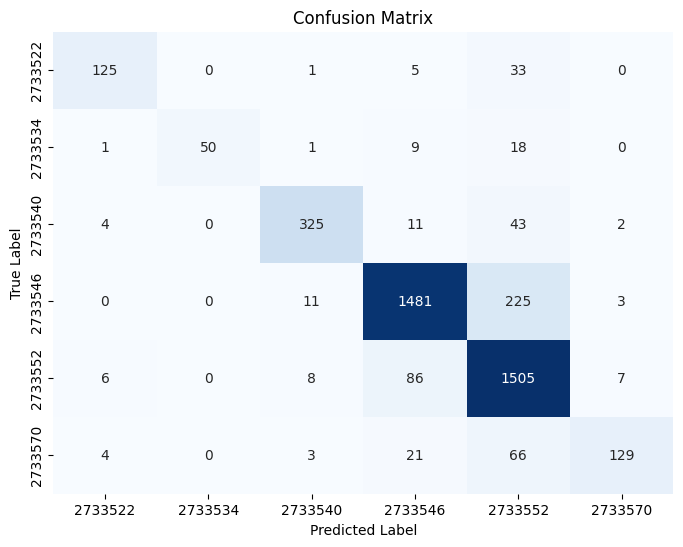

Single_Label_Remove_Np Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7908199856562276
Precision: 0.8204725512902543
Recall: 0.7908199856562276
F1 Score: 0.7876941686623614
Classification Report:
              precision    recall  f1-score   support

     2733522       0.86      0.45      0.59       164
     2733534       0.90      0.48      0.63        79
     2733540       0.93      0.76      0.84       385
     2733546       0.89      0.76      0.82      1720
     2733552       0.69      0.92      0.79      1612
     2733570       0.97      0.48      0.64       223

    accuracy                           0.79      4183
   macro avg       0.87      0.64      0.72      4183
weighted avg       0.82      0.79      0.79      4183



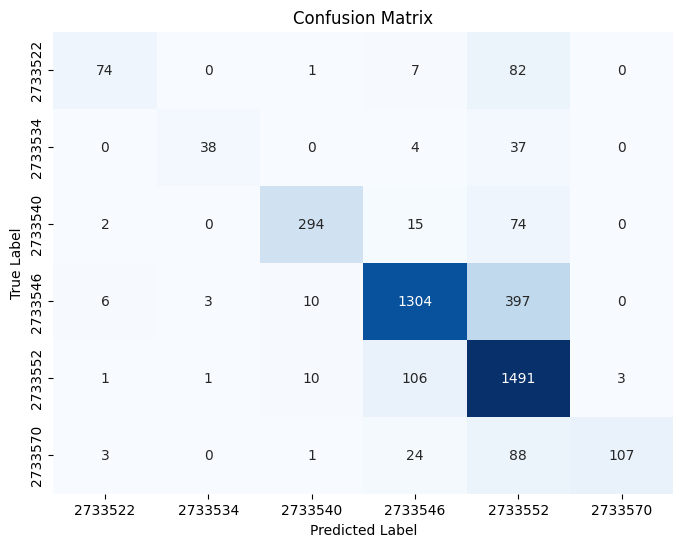

Single_Label TFIDF


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.9292373894334209
Precision: 0.9304496615689521
Recall: 0.9292373894334209
F1 Score: 0.9290338998066773
Classification Report:
              precision    recall  f1-score   support

     2733522       0.94      0.88      0.91       164
     2733534       0.96      0.87      0.91        79
     2733540       0.97      0.93      0.95       385
     2733546       0.95      0.93      0.94      1720
     2733552       0.90      0.95      0.92      1612
     2733570       0.92      0.78      0.85       223

    accuracy                           0.93      4183
   macro avg       0.94      0.89      0.91      4183
weighted avg       0.93      0.93      0.93      4183



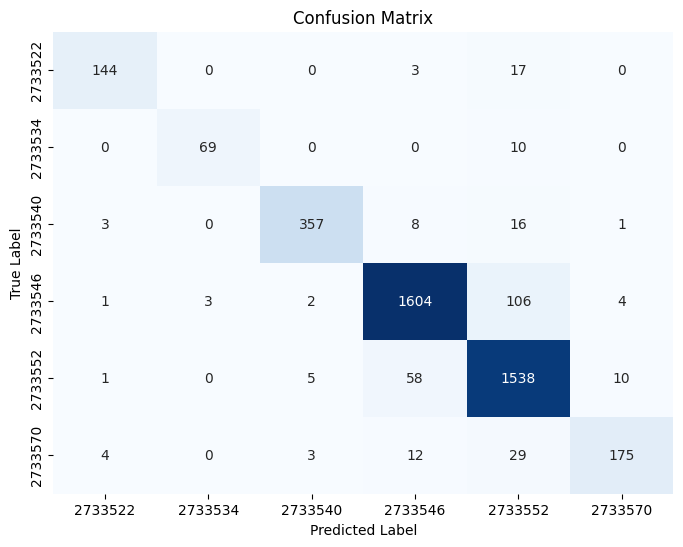

Single_Label Doc2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8689935453024146
Precision: 0.8756597606702974
Recall: 0.8689935453024146
F1 Score: 0.867883493103962
Classification Report:
              precision    recall  f1-score   support

     2733522       0.88      0.74      0.80       164
     2733534       1.00      0.61      0.76        79
     2733540       0.93      0.85      0.89       385
     2733546       0.92      0.87      0.89      1720
     2733552       0.81      0.93      0.87      1612
     2733570       0.88      0.64      0.74       223

    accuracy                           0.87      4183
   macro avg       0.90      0.77      0.82      4183
weighted avg       0.88      0.87      0.87      4183



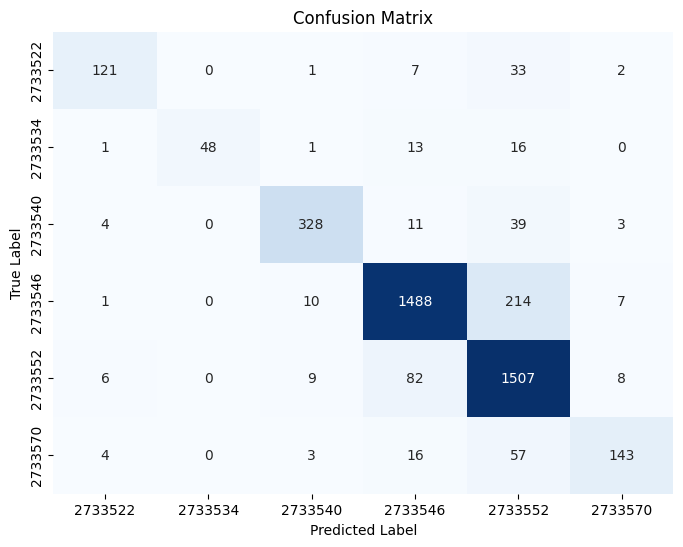

Single_Label Word2Vec


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7953621802534067
Precision: 0.8194790926051941
Recall: 0.7953621802534067
F1 Score: 0.7922172901246883
Classification Report:
              precision    recall  f1-score   support

     2733522       0.84      0.45      0.59       164
     2733534       0.93      0.52      0.67        79
     2733540       0.93      0.76      0.84       385
     2733546       0.88      0.77      0.82      1720
     2733552       0.70      0.92      0.80      1612
     2733570       0.97      0.51      0.67       223

    accuracy                           0.80      4183
   macro avg       0.88      0.65      0.73      4183
weighted avg       0.82      0.80      0.79      4183



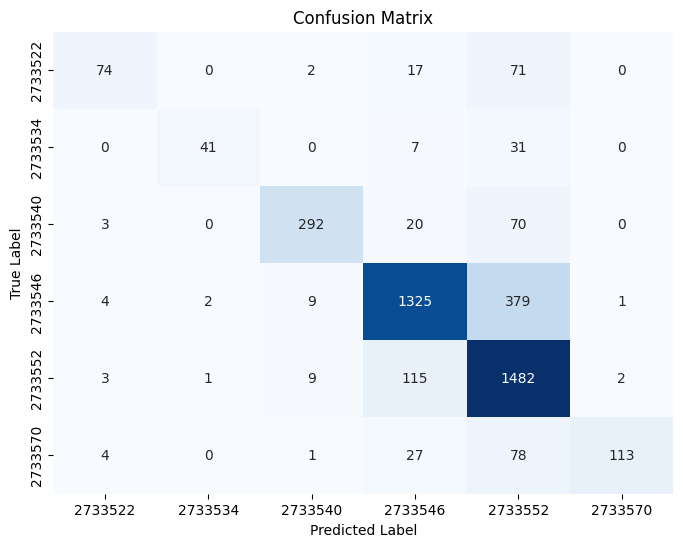

In [9]:
from gensim.models.doc2vec import Word2Vec, Doc2Vec
for type_data_element in type_data:
  for type_vectorizer_element in type_vectorizer:
    print(type_data_element, type_vectorizer_element)
    model = joblib.load('/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/' + type_data_element + '/' + type_vectorizer_element + '/svm_model.joblib')

    df_test = pd.read_csv('/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/test_singlelabel.csv')
    X_test = df_test['input']
    y_test = df_test['ID phòng xử lý']

    if type_vectorizer_element == 'TFIDF':
      vectorizer = joblib.load('/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/' + type_data_element + '/' + type_vectorizer_element + '/model_tfidf.model')
      X_test = vectorizer.transform(X_test).toarray()
    elif type_vectorizer_element == 'Doc2Vec':
      vectorizer = Doc2Vec.load('/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/' + type_data_element + '/' + type_vectorizer_element + '/model_doc2vec.model')
      doc_vectors_test = []
      # Lấy vector cho mỗi tài liệu
      for row in df_test['input']:
        doc_vectors_test.append(vectorizer.infer_vector(row.split()))
      X_test = pd.DataFrame(doc_vectors_test)
    elif type_vectorizer_element == 'Word2Vec':
      vectorizer = Word2Vec.load('/content/gdrive/MyDrive/Thesis/dataset/PreprocessedData/' + type_data_element + '/' + type_vectorizer_element + '/model_word2vec.model')
      vectorized_input_test = vectorize_input(X_test.tolist(), vectorizer)
      X_test = pd.DataFrame(vectorized_input_test)

    y_pred = model.predict(X_test)

     # Tính độ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Tính độ chính xác dự báo dương (Precision)
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision}")

    # Tính khả năng phát hiện đúng (Recall)
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Recall: {recall}")

    # Tính điểm F1 (F1 Score)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1 Score: {f1}")

    # In báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)

    # Lấy các giá trị nhãn từ y_train (không trùng lặp và sắp xếp)
    labels = sorted(list(set(y_test)))

    # Vẽ biểu đồ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()